In [1]:
import numpy as np
import healpy as hp

In [3]:
# Using ring-reordering 
def turn(nside:int,pixel_data:list) -> list:
    """ Shifts each pixel to position of ring neighbour (left)
    Parameters:
    nside -------- resolution of data set
    pixel_data --- data value for each pixel
    
    Returns:
    changed_order_data -- the pixel_data set with rearranged order
    """
    # note1: maybe insert a test to confirm that size of pixel_data corresponds with nside resolution?
    
    # calculate number of rings for given resolution
    n_rings = 4*nside -1  # determined emperically
    
    # create empty lists for each ring
    indices =[]
    for i in range(n_rings): 
        indices.append([])

    # set first pixel's colatitude as initial test
    colat0,long0 = hp.pix2ang(nside,0)
    test = colat0
    
    # list to collect colatitudes -----> note2: can probably be removed from code
    colats = []
    # Ring counter
    n = 0
    # Checks if colatitude of pixel is same as test
    for index,value in enumerate(pixel_data):
        colat_i,long_i = hp.pix2ang(nside,index)
        if colat_i == test:   # Same ring
            colats.append(colat_i)  #--------> note2 contd, can probaly be removed from code
            indices[n].append(index)
        else: # Move to new ring, 
            n +=1
            colats.append(colat_i)  #--------> note2 contd, can probaly be removed from code
            test = colat_i   # change this colatitude to new test value for subsequent piels
            indices[n].append(index)
            
    #print(colats)       
    #print(indices)
    
    # change order of each list
    new_indices = []
    for row in indices:  # for each ring
        np.array(row)
        # Remove last element and make it first
        new_order = np.append(row[-1],row)
        new_order = new_order[:-1]
        new_indices.append(new_order)
    #print(new_indices)
    
    # Join all rings together to create new ordered dataset
    changed_order_indices = np.concatenate(new_indices[:])
    # Use index list to get values 
    changed_order_data = np.array([])
    for index in changed_order_indices:
        changed_order_data = np.append(changed_order_data,pixel_data[index])
    #print(changed_order)
    
    return changed_order_data



<class 'numpy.ndarray'> [ 0.  1.  2.  3.  8.  9. 10. 11.  4.  5.  6.  7. 16. 17. 18. 19. 12. 13.
 14. 15. 24. 25. 26. 27. 20. 21. 22. 23. 32. 33. 34. 35. 28. 29. 30. 31.
 40. 41. 42. 43. 36. 37. 38. 39. 44. 45. 46. 47.]


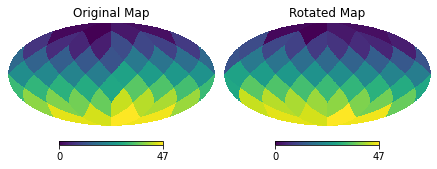

In [43]:
# Generate data
nside = 2
npix = hp.nside2npix(nside)
original_map = np.arange(npix)
changed_order = turn(nside,turn(nside,turn(nside,turn(nside,original_map))))
print(type(original_map,changed_order)
# Visualize maps
hp.mollview(original_map, title='Original Map', sub=(1, 2, 1))
hp.mollview(changed_order, title='Rotated Map', sub=(1, 2, 2))


In [75]:
# Using Rotator

def rot(nside,pixel_data,rot):
    # Create rotation function
    rot = hp.Rotator(rot=rot, deg=True)

    # Get array of indices to work with
    pixel_indices = []
    for index,value in enumerate(pixel_data): pixel_indices.append(index) 
    
    # Get the angular coordinates for each pixel
    theta, phi = hp.pix2ang(nside, pixel_indices)

    # Apply the rotation to these coordinates
    theta_rot, phi_rot = rot(theta, phi)

    # print(theta)
    # print(theta_rot)
    # print(phi)
    # print(phi_rot)

    # Convert the rotated coordinates back to pixel indices
    new_indices = hp.ang2pix(nside, theta_rot, phi_rot)

    # Create a new map with the pixels rearranged
    rotated_map = pixel_data[new_indices]
    return rotated_map



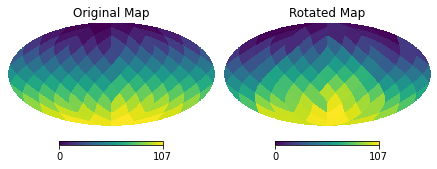

In [74]:
# Generate data
nside = 3
npix = hp.nside2npix(nside)
original_map = np.arange(npix)
rotated_map = rot(nside,original_map,[15,14,0])
#print(original_map,rotated_map)

# Visualize the maps
hp.mollview(original_map, title='Original Map', sub=(1, 2, 1))
hp.mollview(rotated_map, title='Rotated Map', sub=(1, 2, 2))

In [84]:
# Using neighbours
def shift_SW(nside,pixel_data):
    # Collect indices of every SW neighbour
    SW = []
    for index, value in enumerate(pixel_data):
        neighbours = hp.get_all_neighbours(nside,index)
        #print(index,neighbours)
        SW.append(neighbours[0])
    # Get values coresponding to those indices   
    changed_order_data = pixel_data[SW]
    #print(changed_order_data)
    return changed_order_data


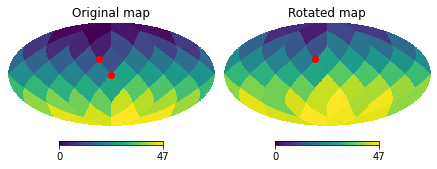

In [83]:
# Generate data
nside = 2
npix = hp.nside2npix(nside)
points = np.arange(npix)
points2 = shift_SW(nside,points)
#print(points,points2)

# Visualize the maps
hp.mollview(points, title = 'Original map', sub = (1,2,1))
hp.projplot(0,0, 'ro', lonlat=True)
hp.mollview(points2, title = 'Rotated map', sub = (1,2,2),min = 0, max = 47)
hp.projplot(22.5,22.5, 'ro', lonlat=True)
